<a href="https://colab.research.google.com/github/Mostafa-Mohamed-Atef/movies-data-science/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/cleaned_movies .csv')
data

year       imdb                                    title  \
0     2013  tt1711425                            21 &amp; over   
1     2012  tt1343727                                 dredd 3d   
2     2013  tt2024544                         12 years a slave   
3     2013  tt1272878                                   2 guns   
4     2013  tt0453562                                       42   
...    ...        ...                                      ...   
1751  1971  tt0067741                                    shaft   
1752  1971  tt0067800                               straw dogs   
1753  1971  tt0067116                    the french connection   
1754  1971  tt0067992  willy wonka &amp; the chocolate factory   
1755  1970  tt0065466           beyond the valley of the dolls   

                 test clean_test  binary    budget  domgross   intgross  \
0              notalk     notalk       0  13000000  25682380   42195766   
1         ok-disagree         ok       1  45000000  13414714   40868994   
2     notalk-disagree     notalk       0  20000000  53107035  158607035   
3              notalk     notalk       0  61000000  75612460  132493015   
4                 men        men       0  40000000  95020213   95020213   
...               ...        ...     ...       ...       ...        ...   
1751           notalk     notalk       0  53012938  70327868  107190108   
1752           notalk     notalk       0  25000000  10324441   11253821   
1753           notalk     notalk       0   2200000  41158757   41158757   
1754     men-disagree        men       0   3000000   4000000    4000000   
1755               ok         ok       1   1000000   9000000    9000000   

          code  budget_2013$  domgross_2013$  intgross_2013$  period code  \
0     2013fail      13000000        25682380        42195766            1   
1     2012pass      45658735        13611086        41467257            1   
2     2013fail      20000000        53107035       158607035            1   
3     2013fail      61000000        75612460       132493015            1   
4     2013fail      40000000        95020213        95020213            1   
...        ...           ...             ...             ...          ...   
1751  1971fail     305063707       404702718       616827003            9   
1752  1971fail     143862856        59412143        64760273            9   
1753  1971fail      12659931       236848653       236848653            9   
1754  1971fail      17263543        23018057        23018057            9   
1755  1970pass       5997631        53978683        53978683            9   

      decade code  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
1751            5  
1752            5  
1753            5  
1754            5  
1755            5  

[1756 rows x 15 columns]

In [ ]:
data.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

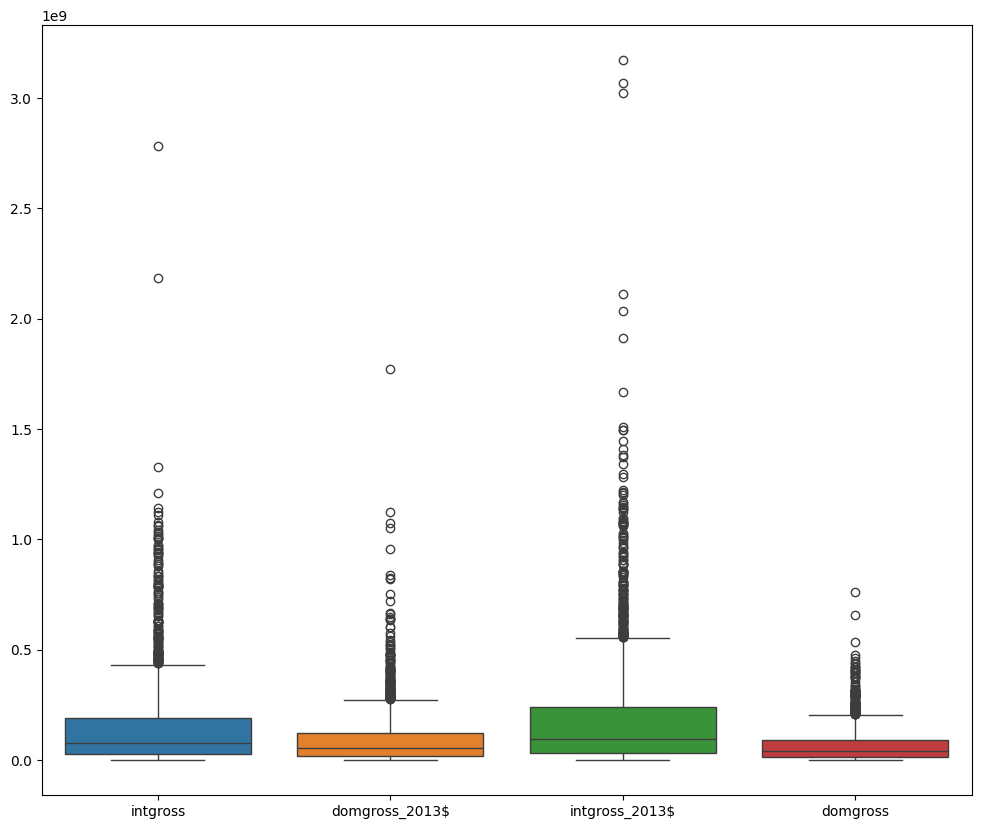

In [ ]:
plt.figure(figsize=[12,10])
sns.boxplot(data[['intgross','domgross_2013$',
       'intgross_2013$','domgross']])
plt.show()

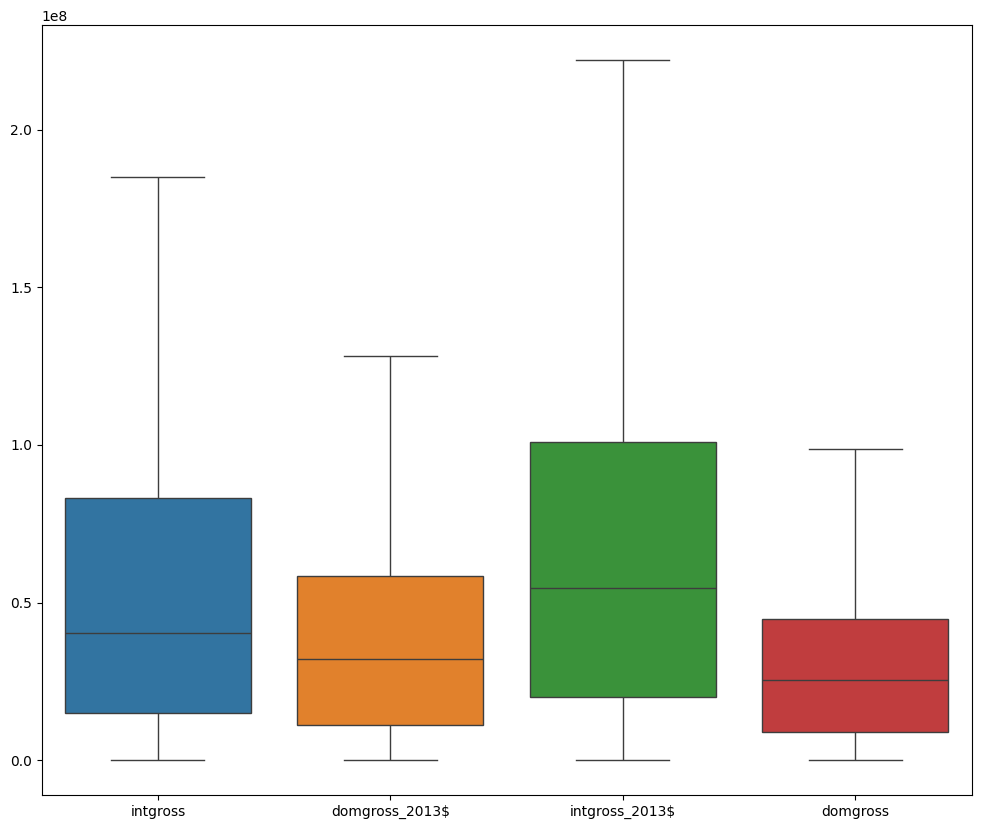

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data_no_outliers = data[(data[column] >= (Q1 - 1.5 * IQR)) & (data[column] <= (Q3 + 1.5 * IQR))]
    return data_no_outliers

# Iteratively remove outliers from all columns
columns = ['intgross', 'domgross_2013$', 'intgross_2013$', 'domgross']
for column in columns:
    data = remove_outliers_iqr(data, column)

plt.figure(figsize=(12, 10))
sns.boxplot(data[columns])
plt.show()

<Axes: >

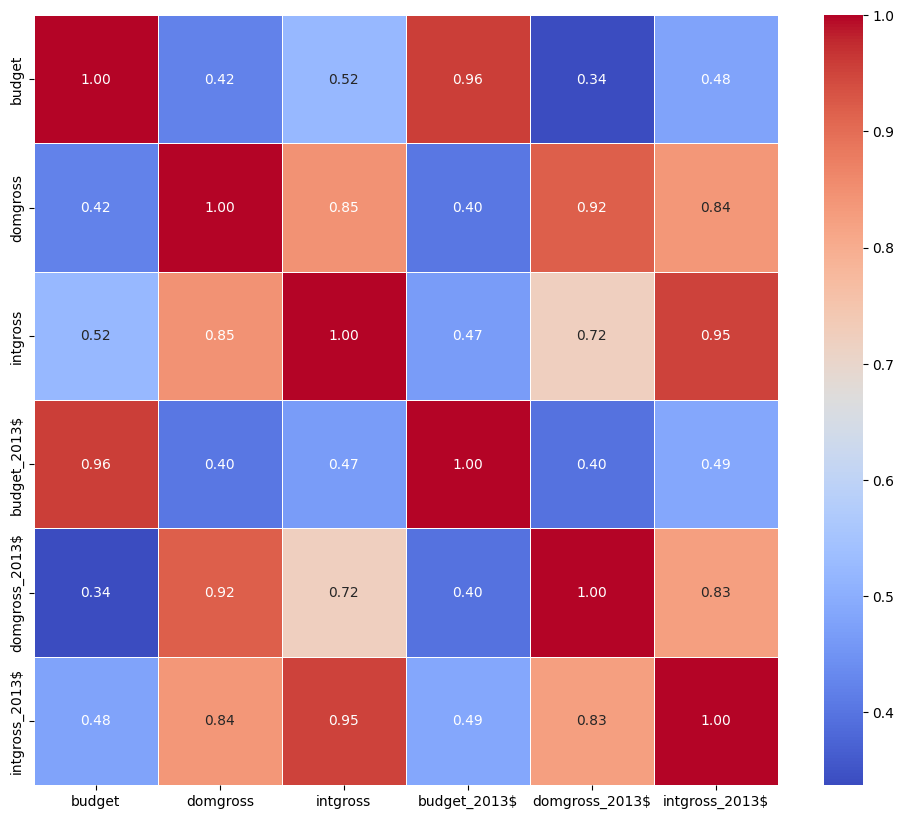

In [ ]:
numerical_columns = [
'budget',
       'domgross', 'intgross','budget_2013$', 'domgross_2013$',
       'intgross_2013$'
]

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

##Linear Regression

In [ ]:
x = data[['intgross','domgross_2013$',
       'intgross_2013$']]
y = data['domgross'].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=44,shuffle = True)

print('x_train : ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (903, 3)
x_test:  (302, 3)
y_train :  (903,)
y_test :  (302,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


linear_regression_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
linear_regression_model.fit(x_train_normalized, y_train)


LinearRegression(n_jobs=-1)

In [ ]:
print(linear_regression_model.score(x_train_normalized,y_train))
print(linear_regression_model.score(x_test_normalized,y_test))

0.9763889056154758
0.9676831231782812


In [ ]:
y_pred = linear_regression_model.predict(x_test_normalized)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error ,r2_score

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2252294.6547471755
mean squared error is 17419987612588.629
median absolute error is 1187547.6312718894
the r2 score 0.9676831231782812


##Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTM = DecisionTreeRegressor(max_depth=10,random_state=33)
DTM.fit(x_train_normalized,y_train)

print(DTM.score(x_train_normalized,y_train))
print(DTM.score(x_test_normalized,y_test))

0.9976776900029415
0.9552740127376466


In [ ]:
y_pred = DTM.predict(x_test_normalized)

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2912070.4757306166
mean squared error is 24108955465256.367
median absolute error is 1149231.5
the r2 score 0.9552740127376466


##KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

CLF = KNeighborsRegressor(11)
CLF.fit(x_train_normalized,y_train)


KNeighborsRegressor(n_neighbors=11)

In [ ]:
print(CLF.score(x_train_normalized,y_train))
print(CLF.score(x_test_normalized,y_test))

0.9756361505752391
0.9708158753388572


In [ ]:
y_pred = CLF.predict(x_test_normalized)

In [ ]:
mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2541989.2459361823
mean squared error is 15731318743638.139
median absolute error is 1673516.4090909073
the r2 score 0.9708158753388572


In [ ]:
data['code']

0       2013fail
1       2012pass
2       2013fail
3       2013fail
4       2013fail
          ...   
1748    1972pass
1750    1971fail
1752    1971fail
1754    1971fail
1755    1970pass
Name: code, Length: 1205, dtype: object

In [ ]:
data['code'] = data['code'].str[4:]
data['code'].value_counts()

code
fail    624
pass    581
Name: count, dtype: int64

In [ ]:
data['passed'] = (data['intgross'] > data['budget']) * 1
data['failed'] = (data['intgross'] < data['budget']) * 1

In [ ]:
data.drop('code',inplace=True,axis='columns')

In [ ]:
data

year       imdb                                    title  \
0     2013  tt1711425                            21 &amp; over   
1     2012  tt1343727                                 dredd 3d   
2     2013  tt2024544                         12 years a slave   
3     2013  tt1272878                                   2 guns   
4     2013  tt0453562                                       42   
...    ...        ...                                      ...   
1748  1972  tt0069089                           pink flamingos   
1750  1971  tt0067065       escape from the planet of the apes   
1752  1971  tt0067800                               straw dogs   
1754  1971  tt0067992  willy wonka &amp; the chocolate factory   
1755  1970  tt0065466           beyond the valley of the dolls   

                 test clean_test  binary    budget  domgross   intgross  \
0              notalk     notalk       0  13000000  25682380   42195766   
1         ok-disagree         ok       1  45000000  13414714   40868994   
2     notalk-disagree     notalk       0  20000000  53107035  158607035   
3              notalk     notalk       0  61000000  75612460  132493015   
4                 men        men       0  40000000  95020213   95020213   
...               ...        ...     ...       ...       ...        ...   
1748               ok         ok       1     12000    413802     413802   
1750           notalk     notalk       0   2500000  12300000   12300000   
1752           notalk     notalk       0  25000000  10324441   11253821   
1754     men-disagree        men       0   3000000   4000000    4000000   
1755               ok         ok       1   1000000   9000000    9000000   

      budget_2013$  domgross_2013$  intgross_2013$  period code  decade code  \
0         13000000        25682380        42195766            1            1   
1         45658735        13611086        41467257            1            1   
2         20000000        53107035       158607035            1            1   
3         61000000        75612460       132493015            1            1   
4         40000000        95020213        95020213            1            1   
...            ...             ...             ...          ...          ...   
1748         66866         2305762         2305762            9            5   
1750      14386286        70780525        70780525            9            5   
1752     143862856        59412143        64760273            9            5   
1754      17263543        23018057        23018057            9            5   
1755       5997631        53978683        53978683            9            5   

      passed  failed  
0          1       0  
1          0       1  
2          1       0  
3          1       0  
4          1       0  
...      ...     ...  
1748       1       0  
1750       1       0  
1752       0       1  
1754       1       0  
1755       1       0  

[1205 rows x 16 columns]

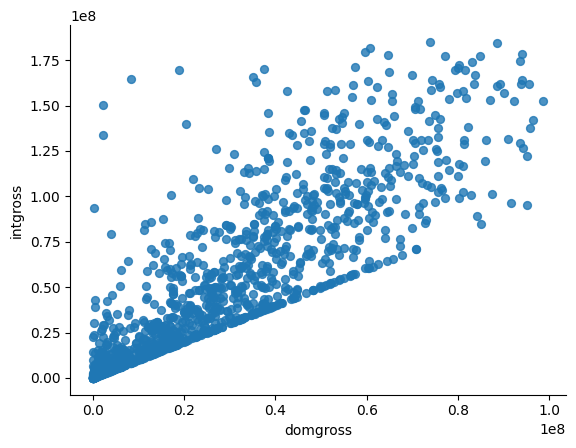

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='domgross', y='intgross', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
input_data = data[['budget','intgross']]


In [ ]:
input_data

budget   intgross
0     13000000   42195766
1     45000000   40868994
2     20000000  158607035
3     61000000  132493015
4     40000000   95020213
...        ...        ...
1748     12000     413802
1750   2500000   12300000
1752  25000000   11253821
1754   3000000    4000000
1755   1000000    9000000

[1205 rows x 2 columns]

#Classification

In [ ]:
data.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code', 'passed', 'failed'],
      dtype='object')

In [ ]:
data[['intgross','budget','passed','failed']].corr()

intgross    budget    passed    failed
intgross  1.000000  0.522035  0.412204 -0.411066
budget    0.522035  1.000000 -0.181773  0.182806
passed    0.412204 -0.181773  1.000000 -0.997889
failed   -0.411066  0.182806 -0.997889  1.000000

In [ ]:
import numpy as np
target_variable = 'passed'
features = ['intgross','budget']
x = data[features]
y = data[target_variable]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44, shuffle=True)

##Naive Bayes

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))
# print(classification_report(y_test,y_pred))

0.7763012181616833
0.8079470198675497


##Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=9,random_state=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=10)

In [ ]:
model.feature_importances_

array([0.5332718, 0.4667282])

In [ ]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9900332225913622
0.9735099337748344


In [ ]:
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9735099337748344

<Axes: xlabel='domgross', ylabel='intgross'>

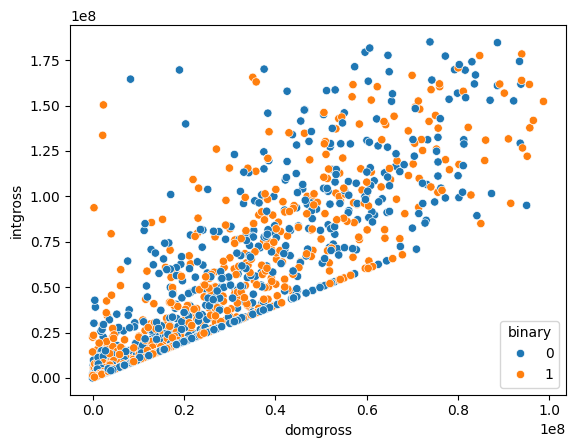

In [ ]:
sns.scatterplot(x=data['domgross'],y=data['intgross'], hue=data['binary'])

##KNN classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9900662251655629
